In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time
import sklearn
%matplotlib inline

In [2]:
df=pd.read_csv('all_stocks_5yr.csv')

In [13]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [14]:
df.shape

(619040, 7)

In [15]:
amzn = df.loc[df['Name'] == 'AMZN']

In [16]:
amzn.shape

(1259, 7)

In [17]:
amzn=amzn.drop('Name',axis=1)

In [40]:
amzn.head()

,date,open,high,low,close,volume
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780


In [84]:
amzn.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,576.867264,582.017221,571.113517,576.880041,3.730465e+06
std,282.500019,284.417123,280.215237,282.500395,2.166506e+06
min,248.940000,252.930000,245.750000,248.230000,1.092970e+06
25%,325.870000,329.485000,322.185000,325.800000,2.511165e+06
50%,506.000000,512.330000,495.640000,503.820000,3.144719e+06
75%,777.620000,781.845000,770.720000,777.420000,4.220246e+06
max,1477.390000,1498.000000,1450.040000,1450.890000,2.385606e+07


In [85]:
#print(amzn.info())
amzn['date']=pd.to_datetime(amzn['date'])
amzn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 46387 to 47645
Data columns (total 6 columns):
date      1259 non-null datetime64[ns]
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 68.9 KB


In [100]:
#amzn_close=amzn.drop(['open','high','low','volume'],axis=1)
date=amzn.drop(['open','high','low','volume','close'],axis=1)
close=amzn.drop(['open','high','low','volume','date'],axis=1)
X_date = mdates.date2num(date)
print(type(x))
y_close=close.values
print(type(y))

<class 'numpy.ndarray'>
<class 'list'>


In [101]:
X_date

array([[734907.],
       [734910.],
       [734911.],
       ...,
       [736730.],
       [736731.],
       [736732.]])

In [128]:
X=[]
y=[]
for sublist in X_date:
    for item in sublist:
        X.append(item)
for sublist in y_close:
    for item in sublist:
        y.append(item)

In [129]:
# Polynomial fit using Numpy
Order = 2 ###You can try different order, calculate the y_calculated 
        #####and then find the MSE to determine which is a better fit
fit = np.polyfit(X,y,Order)
print("Coeff ", fit)
fit1 = np.poly1d(fit,variable="t")
print(fit1)
y1 = fit1(X)

Coeff  [ 3.23991113e-04 -4.76294646e+02  1.75048758e+08]
          2
0.000324 t - 476.3 t + 1.75e+08


In [130]:
#Equation for Order 2
#0.000324 t**2- 476.3 t + 1.75e+08
print(X[0])
X[-1]

734907.0


736732.0

In [131]:
xx = np.linspace(min(X), max(X), 100)
dd = mdates.num2date(xx)
print(type(dd))
y_calculated=[]
y_calculated=fit1(xx)

<class 'list'>


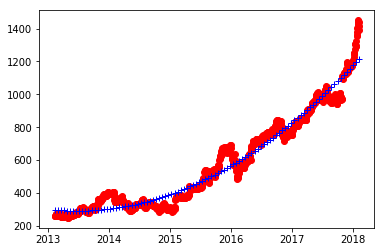

In [132]:
fig, cx = plt.subplots()
cx.plot(date, y, 'ro')
cx.plot(dd, y_calculated, 'b+')
#cx.axis(2013,2018,240,1500)
plt.show()

In [133]:
# OK, now predict values for 2019 and 2020
predict_date1=['2019-01-01']
predict_date2=['2020-01-01']
predict_date1=pd.to_datetime(predict_date1)
predict_date2=pd.to_datetime(predict_date2)
predict_X1 = mdates.date2num(predict_date1)
predict_X2=mdates.date2num(predict_date2)
y1=[]
y2=[]
y1=fit1(predict_X1)
print(y1)
y2=fit1(predict_X2)
print(y2)
y_calculated=np.append(y_calculated,y1)
y_calculated=np.append(y_calculated,y2)
#print(fit1(60000))

[1609.99946454]
[2130.26688686]


In [134]:
#xx1 = np.linspace(min(X), max(X), 100)
dd1 = mdates.num2date(predict_X1)
dd2=mdates.num2date(predict_X2)
dd.extend(dd1)
dd.extend(dd2)
len(dd)

102

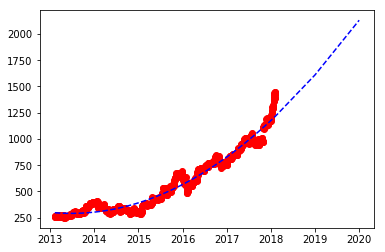

In [136]:
fig, cx = plt.subplots()
cx.plot(date, y, 'ro')
cx.plot(dd, y_calculated, 'b--')
#cx.axis(2013,2018,240,1500)
plt.show()